# Destek Vektör Regresyonu (SVR)

Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek(marjin minimizasyonu) şekilde, doğruyu ya da eğriyi belirlemektir.

Smola(1996) ve Drucker(1997)

------

# 1. Model (SVR)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

In [5]:
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [6]:
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")

In [7]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [8]:
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

In [9]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [10]:
y = df["Salary"]

In [11]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [16]:
X_train.shape

(197, 19)

In [15]:
X_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
148,497.0,136.0,7.0,58.0,38.0,26.0,11.0,3871.0,1066.0,40.0,450.0,367.0,241.0,304.0,347.0,10.0,0,0,0
154,537.0,147.0,23.0,58.0,88.0,47.0,10.0,2744.0,730.0,97.0,302.0,351.0,174.0,92.0,257.0,20.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
279,439.0,96.0,0.0,44.0,36.0,65.0,4.0,711.0,148.0,1.0,68.0,56.0,99.0,229.0,406.0,22.0,1,0,1
88,155.0,41.0,12.0,21.0,29.0,22.0,16.0,5409.0,1338.0,181.0,746.0,805.0,875.0,165.0,9.0,1.0,0,1,0


In [17]:
X_test.shape

(66, 19)

In [18]:
# daha önce görmüş olduğumuz doğrusal regresyon ile arasındaki durumu değerlendireceğiz.
# bunun için test ve train seti için 'Hits' i aldık.

X_train_hits = pd.DataFrame(X_train["Hits"])
X_test_hits = pd.DataFrame(X_test["Hits"])

In [20]:
svr_model = SVR("linear")
svr_model.fit(X_train_hits, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
svr_model.predict(X_train_hits)[:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [64]:
svr_model.intercept_

array([-48.69756098])

In [65]:
svr_model.coef_

array([[4.9695122]])

In [70]:
# svr modelinin içerisinden ilk olarak sabiti aldık.
# sonra da beta1 katsayısını almış olduk.
# basketbol oyuncusu 'hits' kadar sayı attım diyor.
# benim maaşım ne olur derse, buyrun size cevabı.
# hits = x

print("y = {} + {} * x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))  # model denklemim

y = -48.69756097561513 + 4.969512195122093 * x


In [67]:
X_train_hits[0:1]

,Hits
183,91.0


In [68]:
X_train_hits["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [69]:
a = float("%.4f" % (-48.69756097561513 + 4.969512195122093 * 91.0))

b = float("%.4f" % (svr_model.predict(X_train_hits)[:1]))

# eşit olduklarının ispatı
a == b

True

In [71]:
y_pred_train = svr_model.predict(X_train_hits)

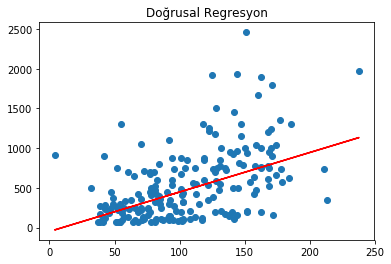

In [85]:
plt.scatter(X_train_hits, y_train)
plt.plot(X_train_hits, y_pred_train, color = "red")
plt.title("Doğrusal Regresyon");

In [77]:
# doğrusal regresyonu çalıştırdığımızdaki karşımıza böyle bir değer alıyoruz.

lm_model = LinearRegression().fit(X_train_hits, y_train)
lm_pred = lm_model.predict(X_train_hits)
print("y = {} + {} * x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 * x


In [81]:
-8.814095480334572 + 5.1724561354706875 * 91 
# doğrusal regresyon 461.879412847498 değerini verdi.

461.879412847498

In [83]:
-48.69756097561513 + 4.969512195122093 * 91
# svr regresyon 403.5280487804953 değerini verdi.

403.5280487804953

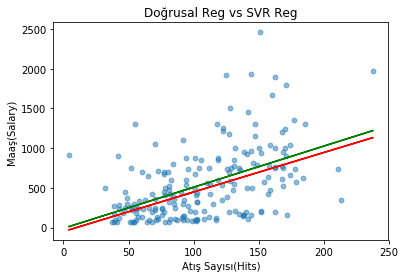

In [92]:
# Doğrusal regresyon ve svr regresyon grafiklerini karşılaştırdığımızda;
# en küçük kareler yönteminden dolayı aykırı gözlemlere dikkatle bak.
# aykırı gözlemler yüzünden regresyon çizgisi daha yukarıda!

plt.scatter(X_train_hits, y_train, alpha = 0.5, s = 23)
plt.plot(X_train_hits, lm_pred, color = "green")
plt.plot(X_train_hits, y_pred_train, color = "red")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)")
plt.title("Doğrusal Reg vs SVR Reg");

-------

# 2. Tahmin (SVR)

In [97]:
y_pred_train = svr_model.predict(X_train_hits)

In [98]:
print("y = {} + {} * x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 * x


In [99]:
svr_model.predict([[91]])

array([403.52804878])

In [100]:
-48.69756097561513 + 4.969512195122093 * 91

403.5280487804953

In [105]:
y_test.head()

148    850.0
154    277.5
318    875.0
279    150.0
88     260.0
Name: Salary, dtype: float64

In [107]:
y_pred_test[0:5]

array([627.15609756, 681.82073171, 627.15609756, 428.37560976,
       155.05243902])

In [110]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
y_pred_test = svr_model.predict(X_test_hits)

In [109]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

459.0187960365147

-----------

# 3. Model Doğrulama / Model Tuning (SVR)

In [111]:
# doğrulama yapmak istediğimiz parametre C = 1.0 parametresi

svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
svr_params = {"C" : np.arange(0.1, 2.0, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10)
svr_cv_model.fit(X_train_hits, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
c_best = svr_cv_model.best_params_  # C = 0.1 olarak verdi.
c_best = pd.Series(c_best)[0]
c_best

0.1

In [120]:
svr_tuned = SVR("linear", C = c_best).fit(X_train_hits, y_train)

In [122]:
y_pred_test = svr_tuned.predict(X_test_hits)

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

458.198966781116

In [128]:
# şimdi sadece 'hits' i değil bütün kolonları hesaplıyalım.
# işlem uzun sürücek :)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [129]:
svr_params = {"C" : np.arange(0.1, 2.0, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
c_best = svr_cv_model.best_params_
c_best = pd.Series(c_best)[0]
c_best

0.4

In [130]:
svr_tuned = SVR("linear", C = c_best).fit(X_train, y_train)

In [131]:
y_pred_test = svr_tuned.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

367.5385297249052

--------